# Python-1, лекция 13

**Лектор:** Петров Тимур

Сегодня мы поговорим о той вещи, с которой так или иначе сталкивается каждый. Вот вы что-то делаете, круто, но необходимо показать людям, что мы достигли результатов. Скидывать таблицы часто неоптимально, потому что по ним мало что понятно сразу. А вот скинуть графичек, где мы такие классные - это выход.

В Python для этого есть как раз библиотеки для визуализации!

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## Matplotlib

Matplotlib изначально задумывался следующим образом: внутри MATLAB есть возможность отрисовывать графики (понятно для чего), однако такой реализации не было в Python. Поэтому изначально он максимально пытался подражать MATLAB для отрисовки, однако дело зашло куда дальше

Это очень хороший и сильный инструмент для отрисовки, однако в нем есть определенный недостаток: он сложно устроен (то есть на нем можно все, но для этого все надо покапаться)

Давайте немного покапаемся в [документации](https://matplotlib.org/stable/api/index.html)

![](https://carboncostume.com/wordpress/wp-content/uploads/2020/07/jacky-brawl-stars-975x600.png)

### База

Давайте разберем базово, как рисовать графики:

* plot - линия

* scatter - точки

* bar - столбики

Чтобы хоть что-то нарисовать, нам нужны две координаты: x и y (и они должна сходиться в размерностях, duh)

Будем рисовать график суммы синусов и косинусов для разнообразия

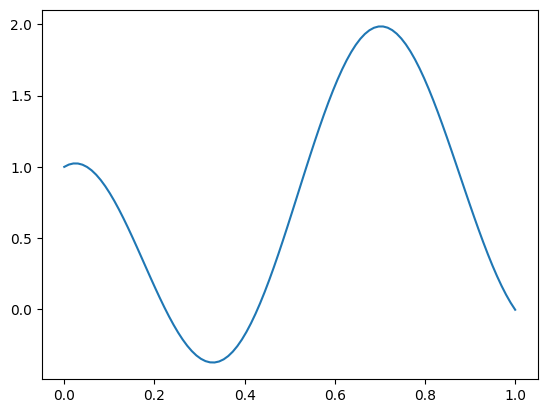

In [2]:
x = np.linspace(0, 1, num=100, endpoint=True)
y = np.sin(2 * x) + np.cos(9 * x)


plt.plot(x, y) # говорим - нарисуй линию
plt.show() # Отдельно вызываем, что график нужно показать, поскольку внутри plt вы создаете просто объект для отрисовки

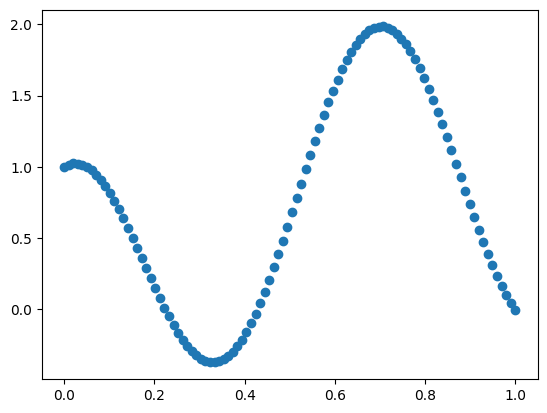

In [3]:
plt.scatter(x, y) # то же самое, но точками
plt.show()

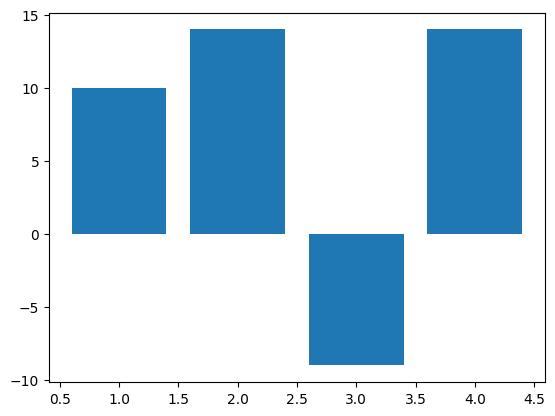

In [4]:
x_bar = [1, 2, 3, 4]
y_bar = [10, 14, -9, 14]
plt.bar(x_bar, y_bar)
plt.show()

### Форматирование осей и подписи

Вот мы что-то нарисовали, чего не хватает?

* подписей

* легенды (что мы вообще нарисовали)

* названия

Давайте добавим!

1. xlabel - подпись OX

2. ylabel - подпись OY

3. title - название графика

4. xticks - масштабы по OX

5. yticks - масштабы по OY


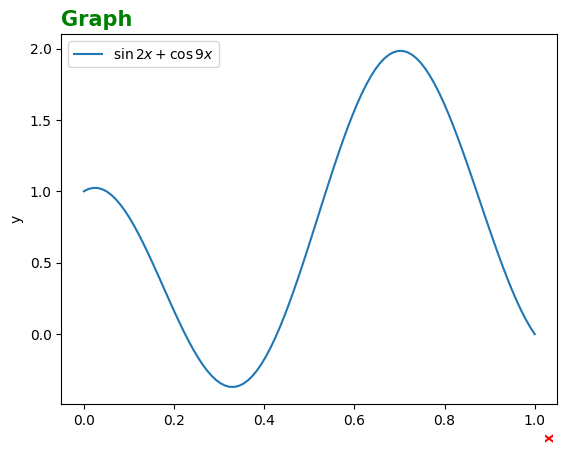

In [8]:
plt.plot(x, y, label="$\sin 2x + \cos 9x$") # в целом поддерживает LaTeX
plt.xlabel('x', fontsize=10, fontweight='bold', color='r', loc='right', rotation=90) # назначить название оси OX
# Умеем настраивать: размер, жирность, цвет, расположение, ротацию), умеем делать это для текста в целом
plt.ylabel('y') # назначить название оси OY
plt.title("Graph", fontsize=15, fontweight='bold', loc='left', color='g') # добавить название графику
plt.legend() #Вывод легенды, если не сделать, то не выведет
plt.show()

Пара комментариев относительно любых строк (когда мы что-то подписываем):

При выхове функции мы получаем объект типа [matplotlib.text](https://matplotlib.org/stable/api/text_api.html). Какие аргументы есть у любого текста:

* fontsize - размер шрифта

* fontweight - вес шрифта (например, bold - жирный шрифт)

* fontstyle - тип шрифта (например, italic)

* rotation - крутим-вертим (в градусах)

* color - цвет

* loc - как размещать (центр, лево-право: center, left, right)

Хорошо, что еще мы можем сделать с осями?

* Мы не всегда хотим в качестве оси X видеть числа (актуально для bar chart: хотим видеть название категории)

* Не всегда хотим видеть всю картину, а хотим ограничить значения x и y

* Иногда хотим видеть более детальную разметку (скажем, сейчас у нас шаг 0.2, а хотим 0.1)

Что же: matplotlib позволяет спокойно все это форматировать и использовать

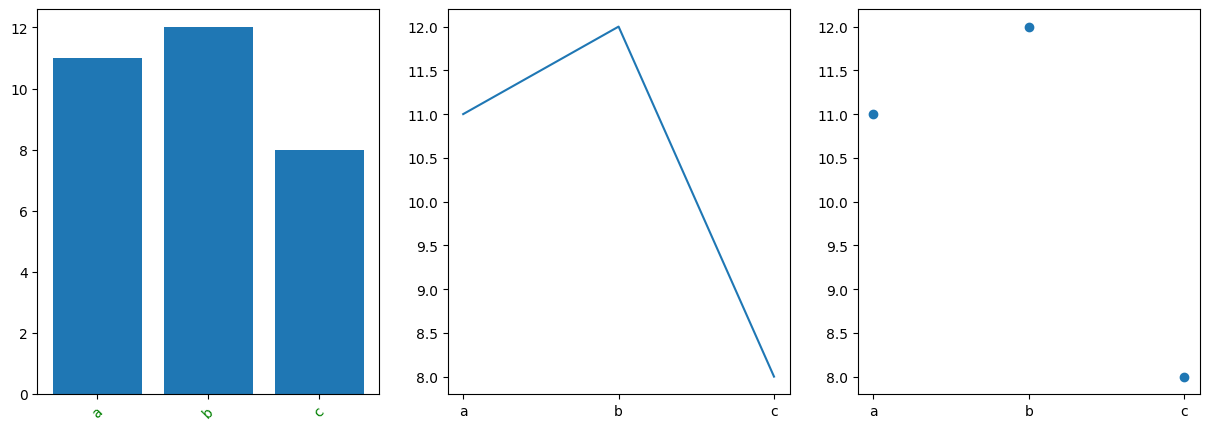

In [5]:
names = ["a", "b", "c"]
values = [11, 12, 8]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.bar(names, values) # работа с bar
plt.xticks(color='g', rotation=45)
plt.subplot(1, 3, 2) # про вот это обсудим позже
plt.plot(names, values) # работа с линией
plt.subplot(1, 3, 3)
plt.scatter(names, values) # работа с точками
plt.show()

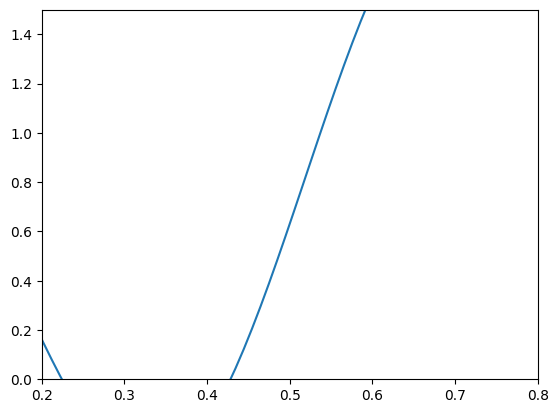

In [6]:
plt.plot(x, y)
plt.xlim((0.2, 0.8)) # ограничить диапазон по x
plt.ylim((0, 1.5)) # ограничить диапазон по y
plt.show() #получили некоторый срез по границам xlim и ylim

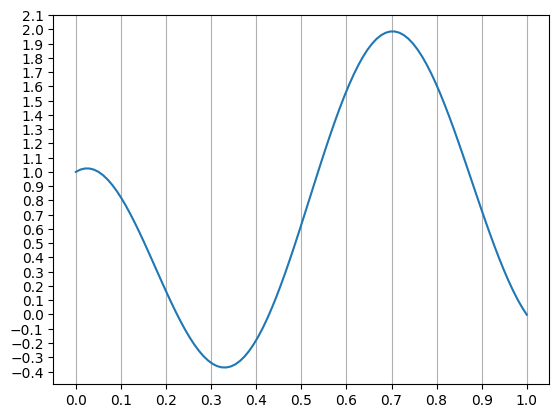

In [9]:
plt.plot(x, y)
plt.xticks(np.arange(min(x), max(x)+0.1, 0.1)) # задаем масштабы для оси OX
plt.yticks(np.arange(-0.4, 2.2, 0.1)) # задаем масштабы для оси OY
plt.grid(axis='x') #Можем также добавить координатную сетку (по дефолту сделает полную сетку)
plt.show()

### Какие еще есть графики?

* hist - гистограммы

* boxplot - "ящик с усами"

* violinplot - диаграмма-виолончель

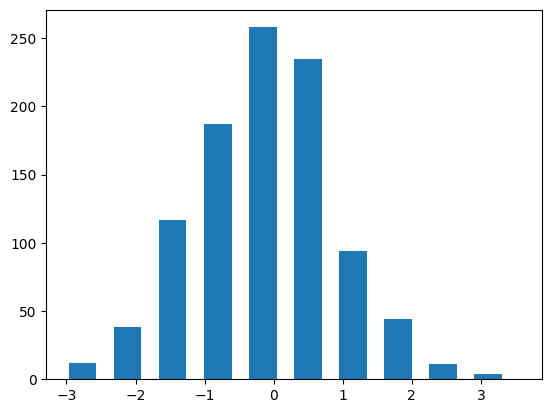

In [10]:
s = np.random.normal(0, 1, 1000) # возьмем нормальное распределение и порисуем

plt.hist(s, bins=10, width=0.4) #на сколько бинов делим наши данные, для красоты уменьшим размер столбцов
plt.show()

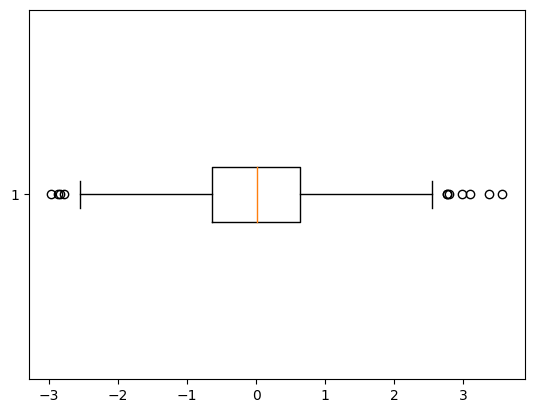

In [11]:
plt.boxplot(s, vert=False)
plt.show() # видим то, что должны были:
# центр - медиана (очевидно в 0)
# коробка - квартили (25 и 75)
# линии - перцентили (5-95)
# точки - выбросы

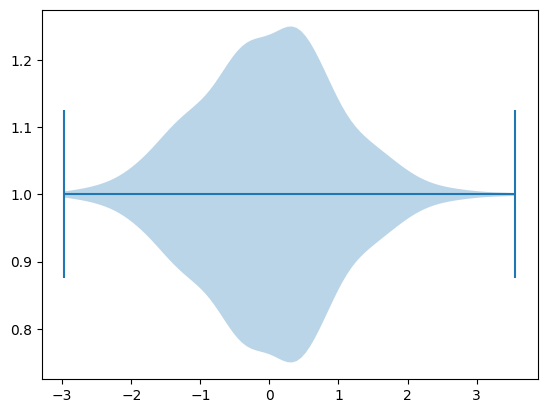

In [12]:
plt.violinplot(s, vert=False) #то же самое, что и ящик с усами, только еще с распределением (видим нормальное - нормально)
plt.show()

### Форматирование графиков

Отлично, теперь мы, допустим, хотим нарисовать несколько линий на одном (или же хотим нарисовать несколько типов графиков на одном):

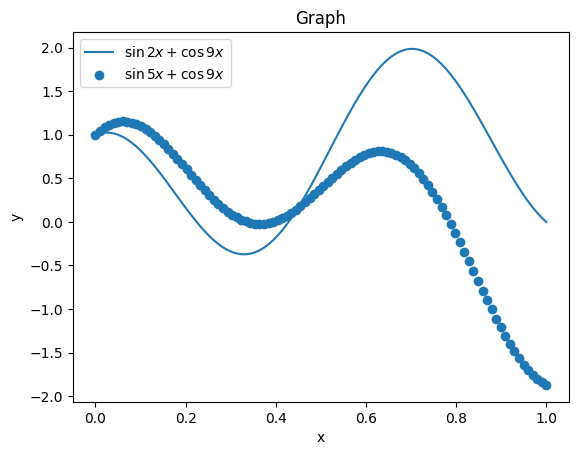

In [13]:
y_1 = np.sin(5 * x) + np.cos(9 * x)

plt.plot(x, y, label="$\sin 2x + \cos 9x$")
plt.scatter(x, y_1, label="$\sin 5x + \cos 9x$") #просто добавляем на отрисовку еще точки
plt.xlabel('x')
plt.ylabel('y')
plt.title("Graph")
plt.legend()
plt.show()

Что плохо? Цвета одинаковые, а еще хотим точки поменьше сделать, наверное (чтобы было более заметны сами точки)

Что предлагает matplotlib для кастомизации?

Plot:

* linewidth - параметр, отвечающий за толщину линии

* [linestyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) - как рисовать (можно черточками, можно прямой линией etc)

* format - можно задать сразу три параметра, передав всего 1 строчку:

```
[marker][line][color] - '^r:'
```

Scatter:

* s - задаем размер точек

* [marker](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) - что ставим (точки, кружочки, квадратики, треугольники etc)

Bar:

* width - толщина столбцов

* bottom - нижняя координата для OY (по дефолту 0)

* align - как центровать координаты x (center, edge - делает слева, но если задать негативный width, то вправо)


Общее:

* [c, color](https://matplotlib.org/stable/tutorials/colors/colors.html) - параметр, задающий цвет (можно задать единый цвет, можно для каждой точки-значения задать свой собственный)

* alpha - прозрачность (от 0 до 1, чем больше - тем более ярко)

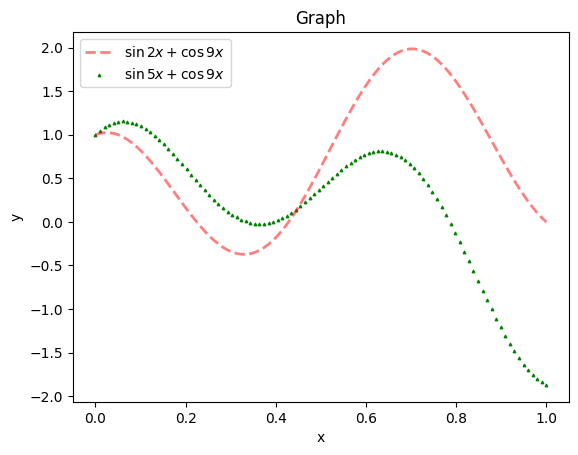

In [14]:
plt.plot(x, y, 'r--', label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.scatter(x, y_1, label="$\sin 5x + \cos 9x$", c='g', s=3, marker='^')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Graph")
plt.legend()
plt.show()

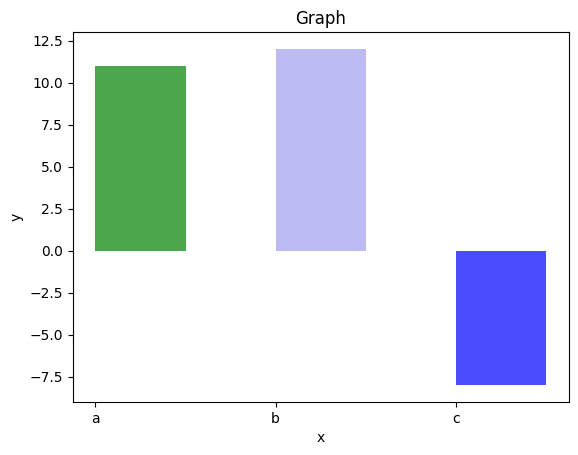

In [15]:
names = ["a", "b", "c"]
values = [11, 12, -8]

plt.bar(names, values, width=0.5, alpha=0.7, align='edge', color=['g', '#a0a0ee', 'b']) #вот тут не работает c, работает color
plt.xlabel('x')
plt.ylabel('y')
plt.title("Graph")
plt.show()

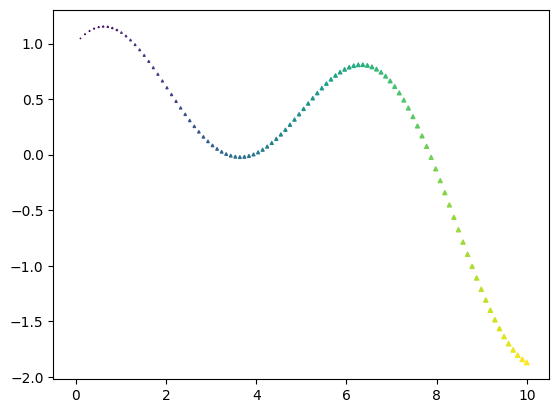

In [16]:
plt.scatter((x * 10), y_1, label="$\sin 5x + \cos 9x$", c=x, s=(x * 10), marker='^') # размеры и цвета можно задавать даже с помощью самих данных!
plt.show()

### Несколько графиков

Отлично, порисовали. Теперь хотим:

* Сделать график больше

* Сделать два графика

* Добавить вторую OY axis

Что вообще происходит, когда мы пишем plt.plot тот же самый?

На самом деле мы создаем объект (типа canvas, холста), на котором происходят все отрисовки (так называемая figure). Это то, что таится под plt. А значит, что у него есть параметры, которые можно менять

Например, если мы сделаем график больше - то передаем значения размеров объекту холста, если делим его на части - то вводим координатную сетку, в которой говорим в какой части холста делать отрисовку (делим нашу общую figure на несколько подфигур)

Есть 2 способа разбить холст на несколько частей:

* plt.subplot(n, m, k) - разбей на части n x m и возьми часть k (нумерация с 1 слева-направо сверху-вниз)

* plt.subplots(figsize, n_cols, n_rows) - делит на части и возвращает фигуру и axes - координатную сетку

В чем может быть проблема у subplots? В том, что он задает фиксированное и забитое железно разделение (то есть тут меньше возможности как-то делить нашу плоскость)


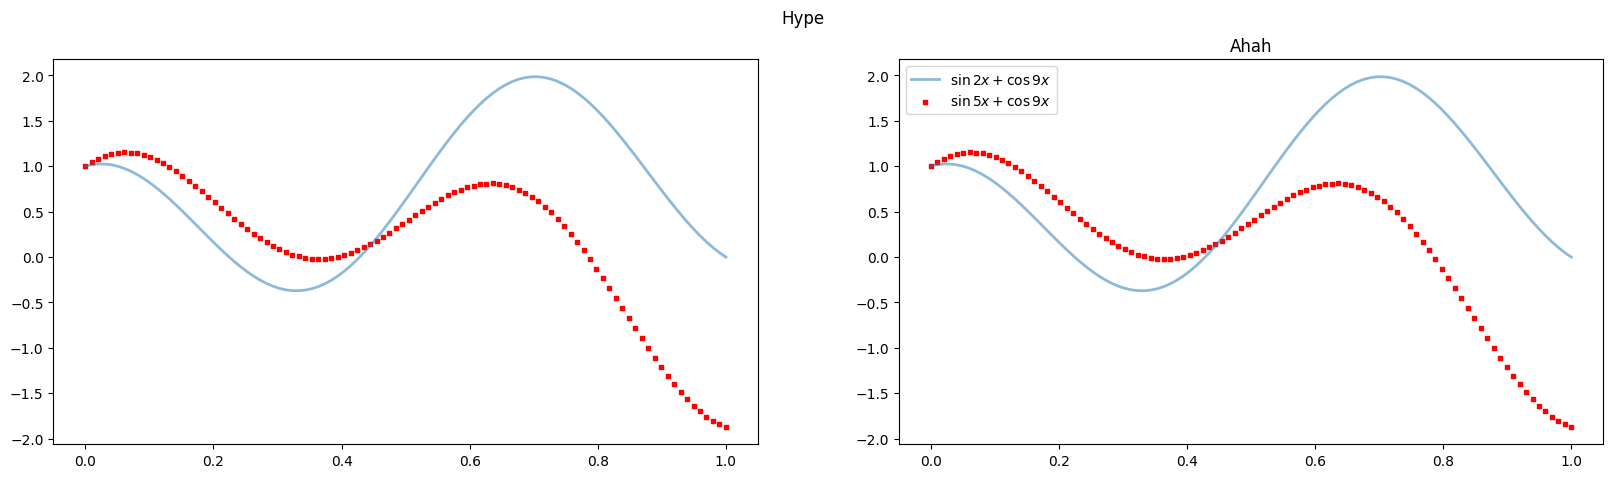

In [17]:
plt.figure(figsize=[20, 5]) #создаем фигуру, внутри которой будем рисовать
plt.suptitle("Hype") # общее название
plt.subplot(1, 2, 1) # создаем subplots (в данном случае разрезали plt на 1x2, обращаемся к 1 части)
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.scatter(x, y_1, marker='s', label="$\sin 5x + \cos 9x$", c='r', s=10)
plt.subplot(1, 2, 2) # обращаемся ко второй части
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.scatter(x, y_1, marker='s', label="$\sin 5x + \cos 9x$", c='r', s=10)
plt.title("Ahah")
plt.legend()
plt.show() # получили две фигуры размера 5x10

А теперь хотим, чтобы один график был поменьше (или туда еще что-нибудь добавить, 2 графика), а второй оставить таким же

Идея: вначале разрезать фигуру на 4 части и в 1,3 добавить наши рисунки. Потом пофигачим на 2 части и нарисуем на второй части то, что нам нужно

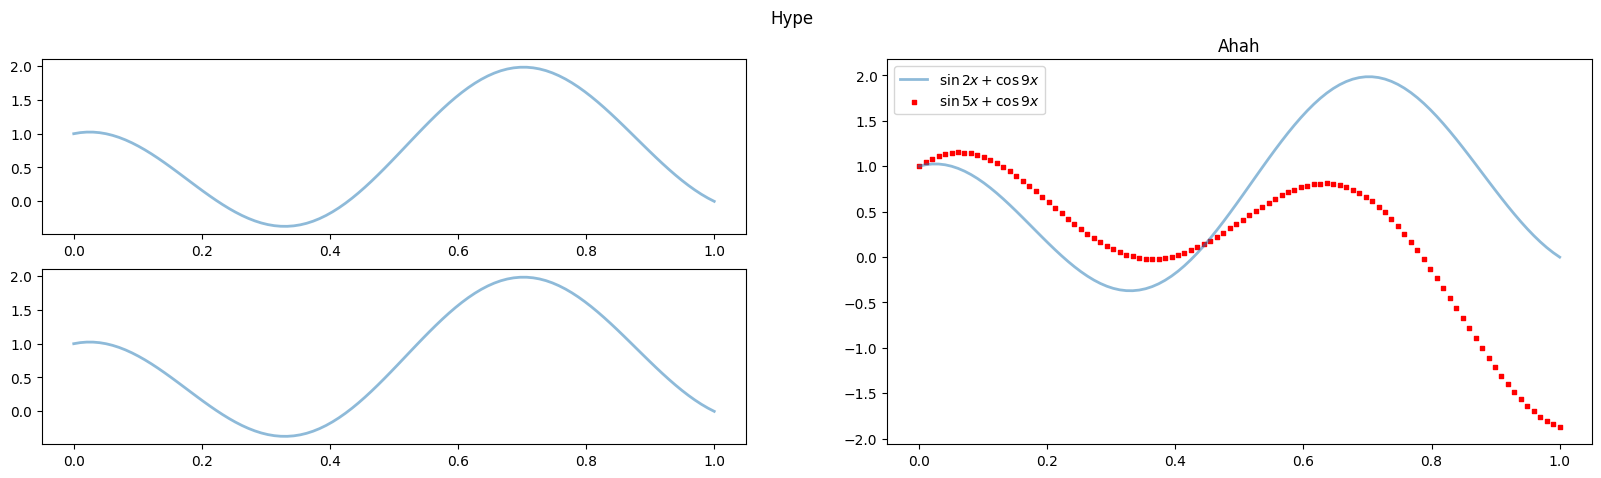

In [18]:
plt.figure(figsize=[20, 5]) #создаем фигуру, внутри которой будем рисовать
plt.suptitle("Hype") # общее название
plt.subplot(2, 2, 1) # обращаемся к 1 части
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.subplot(2, 2, 3) # обращаемся к 3 части
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.subplot(1, 2, 2) # обращаемся ко 2 части разреза 1x2
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.scatter(x, y_1, marker='s', label="$\sin 5x + \cos 9x$", c='r', s=10)
plt.title("Ahah")
plt.legend()

plt.show()

Если происходят конфликты, то последний график затрет все остальные (так что аккуратнее)

<ipython-input-19-fcadc442292b>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2) # но с subplot также хорошо работает


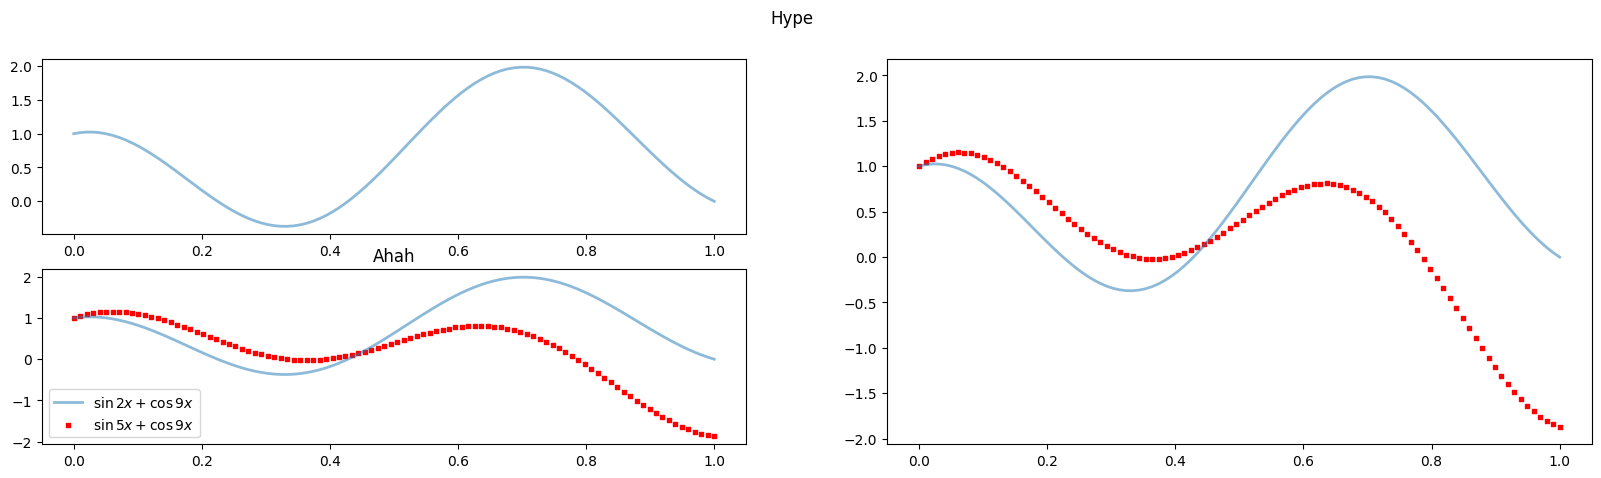

In [19]:
fig, ax = plt.subplots(figsize=[20, 5], nrows=2, ncols=2) #можно вот так создавать сетку

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=[20, 5], nrows=2, ncols=2) #для каждого графика можно отдельно создать свой вид

fig.suptitle("Hype") # общее название
ax[0, 0].plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
ax[1, 0].plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
ax[1, 0].scatter(x, y_1, marker='s', label="$\sin 5x + \cos 9x$", c='r', s=10)
ax[1, 0].set_title("Ahah") # обратите внимание, что если обращаться вот так, то у нас все форматирования идут как set_...
ax[1, 0].legend()

plt.subplot(1, 2, 2) # но с subplot также хорошо работает
plt.plot(x, y, label="$\sin 2x + \cos 9x$", linewidth=2, alpha=0.5)
plt.scatter(x, y_1, marker='s', label="$\sin 5x + \cos 9x$", c='r', s=10)

plt.show()

Теперь нарисуем вот такой график:

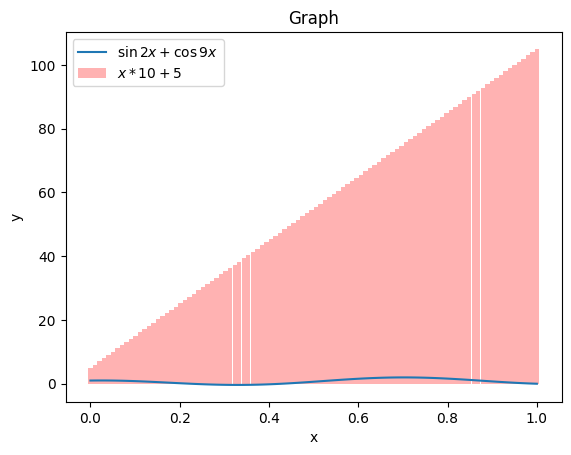

In [20]:
y_1 = x * 100 + 5

plt.plot(x, y, label="$\sin 2x + \cos 9x$")
plt.bar(x, y_1, label="$x * 10 + 5$", width=0.01, color='r', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Graph")
plt.legend()
plt.show()

Выглядит, мягко говоря, плохо. За счет разного масштаба мы получаем нечто непонтяное. Хотелось бы просто иметь разные масштабы для каждого из графиков

Благо, что с помощью subplots мы можем такого добиться!

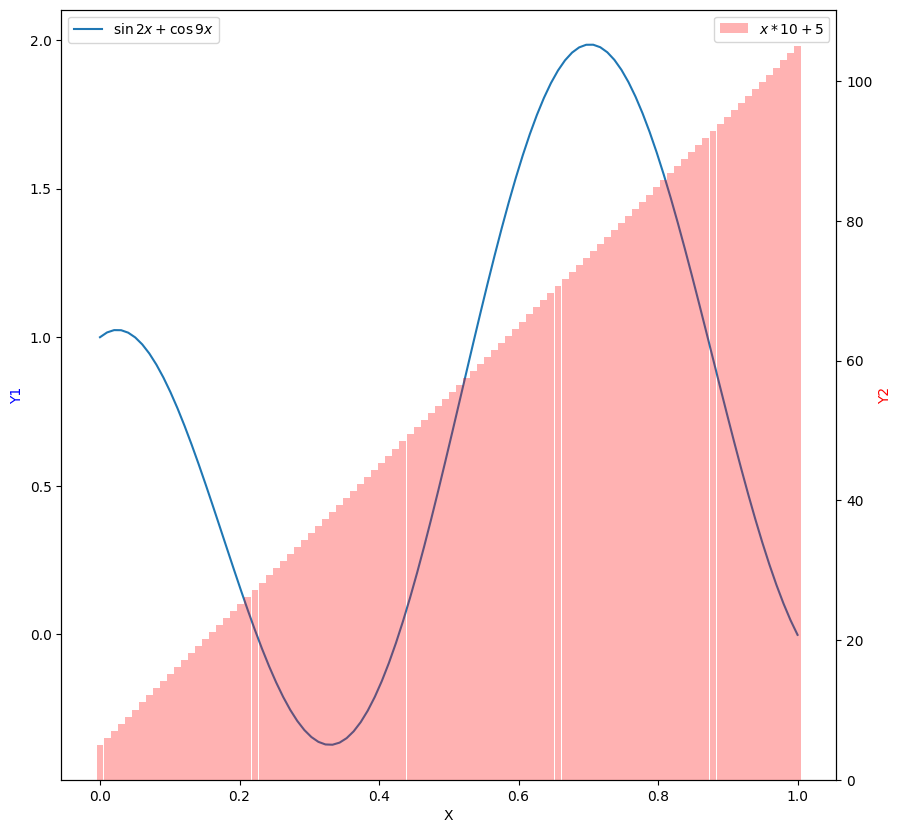

In [21]:
fig, ax1 = plt.subplots(figsize=[10, 10]) #создаем фиктивную сетку размера 1x1

ax1.set_xlabel('X') # обратите внимание, что в subplots все работает через set_
ax1.set_ylabel('Y1', c = 'b')
ax1.plot(x, y, label="$\sin 2x + \cos 9x$")
ax1.legend(loc='upper left') #разместили легенду в другом месте

ax2 = ax1.twinx() #создаем копию, так сказатб
ax2.set_ylabel('Y2', color = 'r')
ax2.bar(x, y_1, label="$x * 10 + 5$", width=0.01, color='r', alpha=0.3)

ax2.legend()
plt.show()

### Подписи на графике

Допустим, что теперь хотим подписать какие-нибудь экстремальные значения (например, что вот тут максимум с таким значением, а тут минимум с таким значением)

Это можно сделать с помощью [annotate](https://matplotlib.org/stable/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py)

В чем проблема? Это делать больно и неприятно, потому что по сути вы должны укзаать, что, куда и как (зато можно делать кучу разных вещей, как будто мы в графическом редакторе)

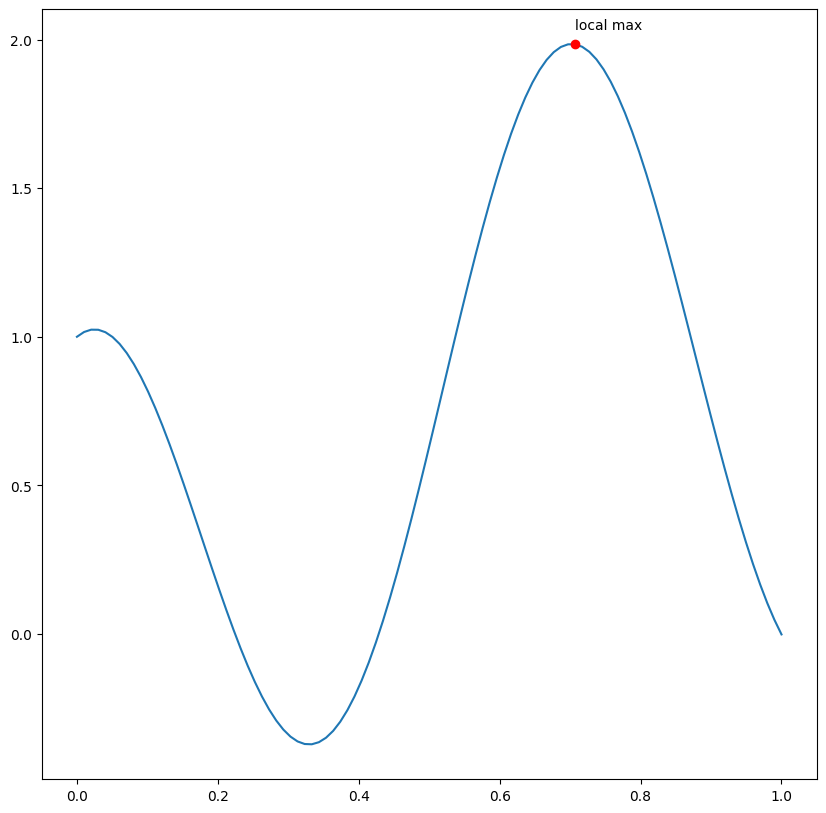

In [22]:
fig, ax = plt.subplots(figsize=[10, 10]) #создаем фиктивную сетку размера 1x1, чтобы размер задать

location = (x[np.argmax(y)], max(y))

ax.plot(x, y, label="$\sin 2x + \cos 9x$")
ax.plot(location[0], location[1], 'or')
ax.annotate('local max', xy=location,
            xytext=(location[0], location[1] + 0.05)
            )
plt.show()

## Seaborn

Хорошо, если matplotlib достаточно мощный, чтобы отрисовывать все, что надо, зачем нужны другие бибилотеки?

Ответ простой: хотим еще проще и более красиво. Хотим, скажем просто загрузить датасет и по нему по щелчку пальца получать все нужные и красивые картиночки (без постоянных передач столбцов etc)

Для этого создали надстройку над matplotlib - seaborn. Внутри нее зашит все тот же matplotlib, но только зашит под капотом + добавлено хорощее вазимодействие с pandas (+ еще красиво выглядит)

[Документация](https://seaborn.pydata.org/index.html)

Вернемся к ониме для того, чтобы это все показать и побольше поисследовать

In [24]:
!wget https://github.com/Palladain/Deep_Python/raw/main/Lectures/Lecture_2/archive.zip

--2023-10-15 20:15:09--  https://github.com/Palladain/Deep_Python/raw/main/Lectures/Lecture_2/archive.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Palladain/Deep_Python/main/Lectures/Lecture_2/archive.zip [following]
--2023-10-15 20:15:09--  https://raw.githubusercontent.com/Palladain/Deep_Python/main/Lectures/Lecture_2/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26259955 (25M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  25.04M  --.-KB/s    in 0.1s    

2023-10-15 20:15:10 (168 MB/s) - ‘archive.zip’ saved [26259955/26259955]


In [25]:
!unzip archive.zip

Archive:  archive.zip
  inflating: anime.csv               
  inflating: rating.csv              


In [26]:
df = pd.read_csv("anime.csv").set_index("anime_id")
df.sample(5)

,name,genre,type,episodes,rating,members
anime_id,,,,,,
8767,Shin Tenchi Muyou! Specials,"Comedy, Romance, Sci-Fi, Shounen",Special,6,7.08,2233
31759,Hakubutsushi,Dementia,Movie,1,5.04,191
287,Grappler Baki (TV),"Shounen, Sports",TV,24,7.41,23220
16211,Bakumatsu Gijinden Roman,"Fantasy, Historical",TV,12,6.20,7816
9797,MonHun Nikki Girigiri Airou Mura: Airou Kiki I...,"Action, Comedy",Special,2,6.08,227


<Figure size 1000x1000 with 0 Axes>

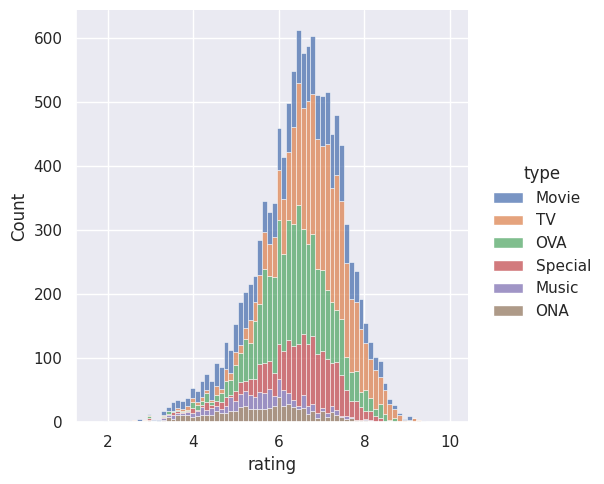

In [27]:
plt.figure(figsize=(10, 10)) #работает на matplotlib, поэтому все работает, как и там
sns.set_theme() #можно поставить красивые темы, но давайте пока по дефолту (он тоже красивый)
sns.displot(
    data=df,
    x="rating",
    hue="type",
    multiple='stack'
)
plt.show() # Получаем гистограмму!

Бум, получили сразу гистограммы с аггрегацией по типу без ненужных проблем!

(Задание на много минут: постройте то же самое с помощью чистого matplotlib)

Что хорошего в seaborn с точки зрения управления?

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Внутри seaborn графики разделены на 3 части по типу того, что мы хотим видеть:

* Посмотреть зависимость (replot)

* Посмотреть распределение (distplot)

* Посмотреть что-то в разбитии по категориям (catplot)

За счет выделения по частям мы получаем схожий интерфейс (единственная разница - указать kind)

Ладно, вот у нас есть какие-то данные численные (рейтинг, число эпизодов, мемберы)

Хотим посмотреть на то, а как они там зависят друг от друга. Как это сделать?

Можно было бы просто нарисовать графики в matplotlib, а можем нарисовать jointplot, в котором будут видны не только сами точки, но и распределения

In [28]:
tips = sns.load_dataset("tips") #посмотрим на одном из standalone датасете из seaborn
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


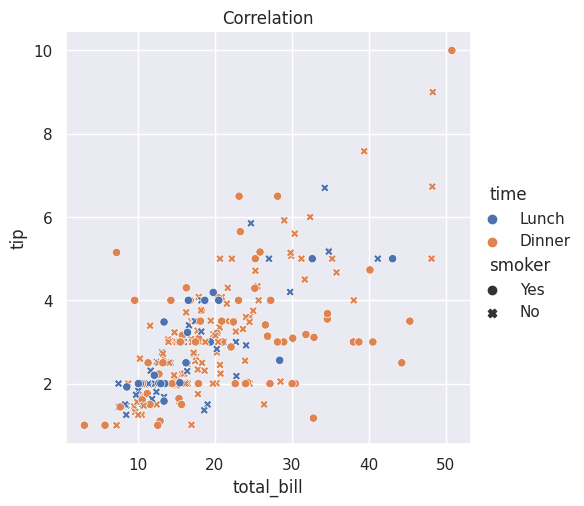

In [29]:
sns.relplot(data=tips, x="total_bill", y="tip", hue='time', style='smoker')
#hue - параметр, по которому разбиваем по типу
#style - нарисовать разными точками по типу
#еще есть size - по размерам
plt.title("Correlation")
plt.show()

А если у нас, например, есть дата, где может быть много одинаковых значений x, но разные значения y?

Если попробовать просто нарисовать линию, то будет плохо. Хотим линию с некоторым доверительным интервалом

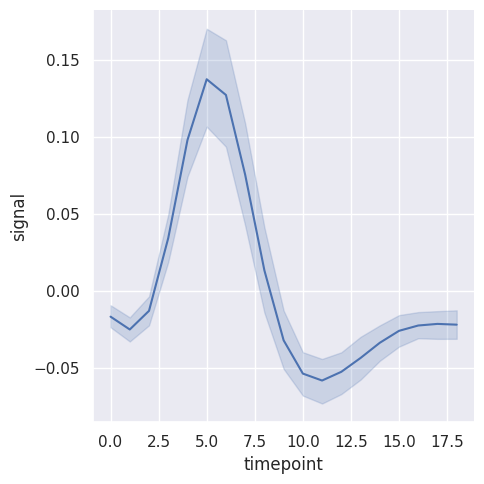

In [30]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line") #с помощью kind рисуем именно линию, а не scatter
plt.show()

## Попугай дня

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Rainbow_lorikeet.jpg/1024px-Rainbow_lorikeet.jpg)

А это радужный лори! 🌈🌈🌈

Прекрасный разноцветный лори, более пестрого попугая, кажется, нет. Очень хорошо приспосабливаются, и являются одним из двух видов попугаев, которых можно содержать в неволе (вместе с красным лори)

А то, что они хорошо приживаются, выяснилось в результате случайности, их в 90-х выпустили в западной Австралии, они там образовали стабильную популяцию и теперь являются там вредителями, которые собой просто замещают других птиц в экосистеме